<a href="https://colab.research.google.com/github/alexander34ro/AML-Replicating-Novel-Deep-Learning-with-CNN-and-Bi-Directional-LSTM-for-Improved-Index-Prediction/blob/main/AML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports and listed versions

In [69]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [70]:
print(f'tensorflow=={tf.__version__}')
print(f'pandas=={pd.__version__}')
print(f'numpy=={np.__version__}')
print(f'matplotlib=={matplotlib.__version__}')

tensorflow==2.3.0
pandas==1.1.4
numpy==1.18.5
matplotlib==3.2.2


### Data sources

* S&P500 from 2008-01-02 to 2018-11-27 (as used in the paper): https://finance.yahoo.com/quote/%5EGSPC/history?period1=1199232000&period2=1543276800&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

* Wilshire 5000: https://finance.yahoo.com/quote/%5EW5000/history?period1=1573911138&period2=1605533538&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

In [172]:
url_sp500 = 'https://raw.githubusercontent.com/alexander34ro/AML-Replicating-Novel-Deep-Learning-with-CNN-and-Bi-Directional-LSTM-for-Improved-Index-Prediction/main/S%26P500.csv'
url_wilshire = 'https://raw.githubusercontent.com/alexander34ro/AML-Replicating-Novel-Deep-Learning-with-CNN-and-Bi-Directional-LSTM-for-Improved-Index-Prediction/main/%5EW5000.csv'

## S&P500 data description

In [153]:
df = pd.read_csv(url_sp500, index_col='Date')

In [154]:
print(f'Number of rows: \t{df.shape[0]}')
print(f'Number of columns: \t{df.shape[1]}')
print(f'Columns: \t\t{", ".join(list(df.columns))}')

Number of rows: 	2746
Number of columns: 	6
Columns: 		Open, High, Low, Close, Adj Close, Volume


In [155]:
# first 5 rows
df.head(5)
# last 5 rows
#df.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,1467.969971,1471.770020,1442.069946,1447.160034,1447.160034,3452650000
2008-01-03,1447.550049,1456.800049,1443.729980,1447.160034,1447.160034,3429500000
2008-01-04,1444.010010,1444.010010,1411.189941,1411.630005,1411.630005,4166000000
2008-01-07,1414.069946,1423.869995,1403.449951,1416.180054,1416.180054,4221260000
2008-01-08,1415.709961,1430.280029,1388.300049,1390.189941,1390.189941,4705390000


In [156]:
# summary statistics
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2.746000e+03
mean,1708.300461,1717.542164,1698.229986,1708.533732,1708.533732,4.018196e+09
std,560.929267,560.822181,560.947662,560.846932,560.846932,1.142968e+09
min,679.280029,695.270020,666.789978,676.530029,676.530029,1.025000e+09
25%,1257.654999,1264.467499,1247.747467,1257.772522,1257.772522,3.314200e+09
50%,1635.734985,1646.455017,1628.980041,1637.265015,1637.265015,3.745685e+09
75%,2098.585083,2104.265015,2088.189941,2098.777587,2098.777587,4.456238e+09
max,2936.760010,2940.909912,2927.110107,2930.750000,2930.750000,1.145623e+10


In [157]:
# check if any of the columns has missing values
df.isnull().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

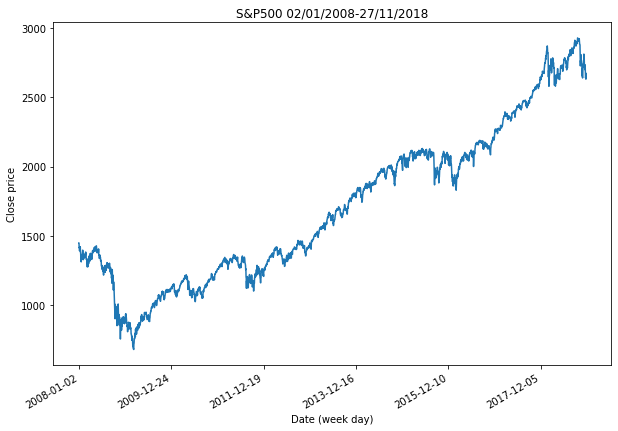

In [158]:
# adapted from: https://matplotlib.org/3.1.0/gallery/text_labels_and_annotations/date_index_formatter.html

import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(10,7))

N = df.index.size
ind = np.arange(N)  # the evenly spaced plot indices

ax.plot(ind, df['Close'])

def format_date(x, pos=None):
    thisind = np.clip(int(x + 0.5), 0, N - 1)
    return df.index[thisind]

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
fig.autofmt_xdate()

ax.set_ylabel('Close price')
ax.set_xlabel('Date (week day)')
ax.set_title('S&P500 02/01/2008-27/11/2018')
plt.show()

## Wilshire 5000 data description

In [173]:
df = pd.read_csv(url_wilshire, index_col='Date')

In [160]:
print(f'Number of rows: \t{df.shape[0]}')
print(f'Number of columns: \t{df.shape[1]}')
print(f'Columns: \t\t{", ".join(list(df.columns))}')

Number of rows: 	2746
Number of columns: 	6
Columns: 		Open, High, Low, Close, Adj Close, Volume


In [161]:
# first 5 rows
df.head(5)
# last 5 rows
#df.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,14613.570313,14613.570313,14613.570313,14613.570313,14613.570313,0.0
2008-01-03,14587.919922,14587.919922,14587.919922,14587.919922,14587.919922,0.0
2008-01-04,14210.849609,14210.849609,14210.849609,14210.849609,14210.849609,0.0
2008-01-07,14229.799805,14229.799805,14229.799805,14229.799805,14229.799805,0.0
2008-01-08,13963.200195,13963.200195,13963.200195,13963.200195,13963.200195,0.0


In [162]:
# summary statistics
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2740.000000,2740.000000,2740.000000,2740.000000,2740.000000,2740.0
mean,17826.795558,17912.301265,17738.106917,17833.180675,17833.180675,0.0
std,5873.519599,5890.666621,5854.148448,5871.715705,5871.715705,0.0
min,6858.430176,6858.430176,6858.430176,6858.430176,6858.430176,0.0
25%,13062.697754,13107.312744,13026.557129,13069.782226,13069.782226,0.0
50%,17269.719726,17354.865235,17175.214844,17282.299804,17282.299804,0.0
75%,22029.310059,22143.919434,21916.495606,22046.445312,22046.445312,0.0
max,30518.599609,30560.539063,30401.960938,30462.289063,30462.289063,0.0


In [163]:
# check if any of the columns has missing values
df.isnull().any()

Open         True
High         True
Low          True
Close        True
Adj Close    True
Volume       True
dtype: bool

In [174]:
# get dates for which close price is missing
import datetime

def is_weekday(datetime_str):
  "Assumes datetime_str has format year-month-day, e.g. 2000-05-28."
  datetime_obj = datetime.datetime.strptime(datetime_str, '%Y-%m-%d')
  return datetime_obj.weekday() < 5

missing = df.index[df['Close'].isnull()]
print(f'There are {missing.size} missing values for the close price.')
print('The missing dates are:')
for date in missing: print(f'{date} --- is week day: {is_weekday(date)}')

There are 6 missing values for the close price.
The missing dates are:
2016-04-01 --- is week day: True
2016-05-03 --- is week day: True
2016-05-31 --- is week day: True
2016-07-22 --- is week day: True
2016-08-23 --- is week day: True
2016-08-25 --- is week day: True


In [175]:
# drop rows with missing values
df = df.dropna()

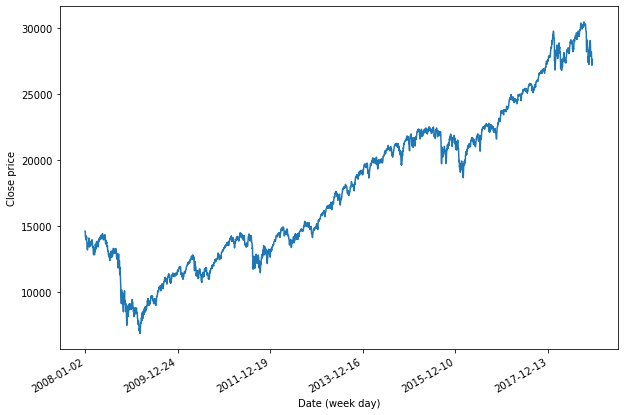

In [176]:
# adapted from: https://matplotlib.org/3.1.0/gallery/text_labels_and_annotations/date_index_formatter.html

import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(10,7))

N = df.index.size
ind = np.arange(N)  # the evenly spaced plot indices

ax.plot(ind, df['Close'])

def format_date(x, pos=None):
    thisind = np.clip(int(x + 0.5), 0, N - 1)
    return df.index[thisind]

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
fig.autofmt_xdate()

ax.set_ylabel('Close price')
ax.set_xlabel('Date (week day)')
plt.show()

## S&P500 and  Wilshire 5000 joint plot

In [184]:
df_sp500 = pd.read_csv(url_sp500, index_col='Date')
df_wilshire = pd.read_csv(url_wilshire, index_col='Date')

In [185]:
# drop missing rows for close price
missing = df_wilshire.index[df_wilshire['Close'].isnull()]
df_sp500.drop(index=missing, inplace=True)
df_wilshire.drop(index=missing, inplace=True)

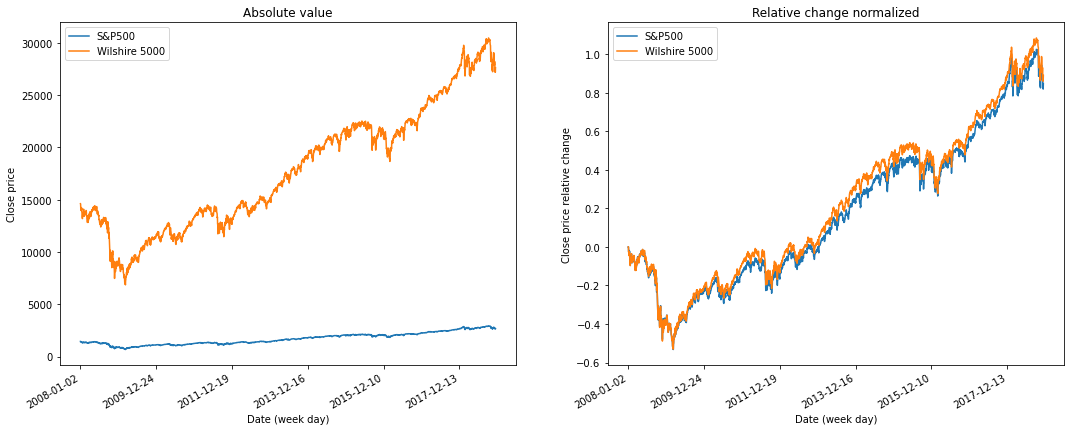

In [193]:
# adapted from: https://matplotlib.org/3.1.0/gallery/text_labels_and_annotations/date_index_formatter.html

import matplotlib.ticker as ticker

fig, axes = plt.subplots(1, 2, figsize=(18,7))

N = df_sp500.index.size
ind = np.arange(N)  # the evenly spaced plot indices

# absolute value
axes[0].plot(ind, df_sp500['Close'], label='S&P500')
axes[0].plot(ind, df_wilshire['Close'], label='Wilshire 5000')
axes[0].set_title('Absolute value')
axes[0].set_ylabel('Close price')
axes[0].set_xlabel('Date (week day)')

# relative change normalized
def normalize(x):
  return (x - x[0]) / x[0]
axes[1].plot(ind, normalize(df_sp500['Close']), label='S&P500')
axes[1].plot(ind, normalize(df_wilshire['Close']), label='Wilshire 5000')
axes[1].set_title('Relative change normalized')
axes[1].set_ylabel('Close price relative change')
axes[1].set_xlabel('Date (week day)')


def format_date(x, pos=None):
    thisind = np.clip(int(x + 0.5), 0, N - 1)
    return df.index[thisind]

for ax in axes:
  ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
  ax.legend()

fig.autofmt_xdate()
plt.show()

## Construct normalized sequences

In [113]:
def make_sequences(timeseries, sequence_length, to_numpy=False):
  """
  timeseries: pandas.Series
  sequence_length: positive integer
  to_numpy: Bool (default=False)

  Returns pandas.DataFrame where each column is named after the first day of the
  sequence and holds sequence_length number of consecutive entries of timeseries
  which we call a sequence.
  If to_numpy is True, then convert pandas.DataFrame to numpy array of shape
  (timeseries.size - sequence_length + 1, sequence_length).
  """
  sequence_ix = [np.arange(i, i + sequence_length) for i in np.arange(timeseries.size - sequence_length + 1)]
  df = pd.DataFrame(columns=timeseries.index[:-sequence_length+1],
                    data=np.array([timeseries[ix] for ix in sequence_ix]).T,
                    index=np.arange(sequence_length))
  df.columns.rename('First day of sequence', inplace=True)
  df.index.rename('Day', inplace=True)
  if to_numpy:
    return df.to_numpy().T
  else:
    return df

#### make_sequence usage example: 50 day running mean

In [132]:
seqdf = make_sequences(df['Close'], 50)
running_mean_series = seqdf.mean()

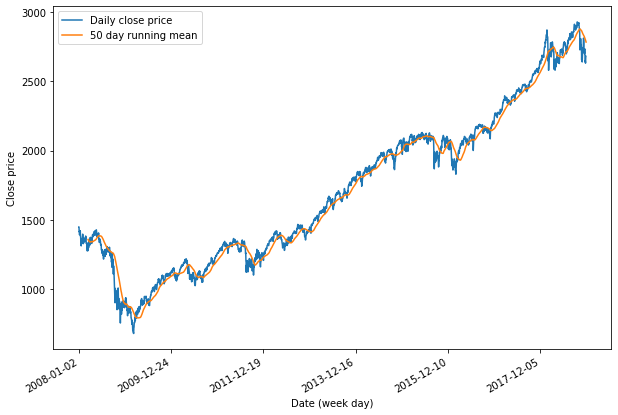

In [133]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(10,7))

N = df['Close'].index.size
ind = np.arange(N)  # the evenly spaced plot indices
ind_ = np.arange(running_mean_series.size) + 50

ax.plot(ind, df['Close'], label='Daily close price')
ax.plot(ind_, running_mean_series, label='50 day running mean')

def format_date(x, pos=None):
    thisind = np.clip(int(x + 0.5), 0, N - 1)
    return df.index[thisind]

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
fig.autofmt_xdate()

ax.set_ylabel('Close price')
ax.set_xlabel('Date (week day)')
plt.legend()
plt.show()

#### Relative change normalization
"Each of the data segments was normalized by subtracting each price in the sequence by the first price in the sequence, then divide by the first price in the sequence. This form of normalization is called relative change."

In [138]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html#pandas.DataFrame.apply

def relative_change_normalization(df):
  """
  df: pandas.DataFrame

  Returns df where each column is normalized by subtracting the first row of the
  column and then dividing by the first row of t&he column.
  """
  return df.apply(lambda x: (x - x[0]) / x[0])&